# Classification Problem Using Different Machine Learning Techniques
The primary source for the Tutorial - https://www.mindsmapped.com/what-is-classification-in-machine-learning-an-use-case-in-automobile-domain-using-python/. However, the Tutorial was modified and I used when I was practicing different algorithm using Python for Data Science

The dataset can be downloaded on Kaggle.com - https://www.kaggle.com/elikplim/car-evaluation-data-set

This tutorial comprises of different classification algorithms which is implemented on a real life dataset. Each Algorithm were decribed and implemented using Scikit Learn Package in Python. The classification Algorithm considered in the Tutorial are:

- Decision Tree
- K-Nearest Neighbor (K-NN)
- Naive Bayes
- Random Forest
- Ligostic Regression
- Support Vector Machine (SVM)
- XG-Boost

# Classification in Machine Learning
In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Examples of classification problems include:

Given an example, classify if it is spam or not.
Given a handwritten character, classify it as one of the known characters.
Given recent user behavior, classify as churn or not.
From a modeling perspective, classification requires a training dataset with many examples of inputs and outputs from which to learn.

A model will use the training dataset and will calculate how to best map examples of input data to specific class labels. As such, the training dataset must be sufficiently representative of the problem and have many examples of each class label.

Also, Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The dataset for this tutorial will be used to classify "Whether a used car is acceptable for other customer during it next purchase". The dataset has 7 columns as highlighted below: 

- Buying price: very high, high, medium, low
- Maintenance price: very high, high, medium, low
- Number of doors: 2, 3, 4, 5 or more.
- Number of persons: 2, 4, more.
- Size of luggage boot: small, medium, big.
- Safety: low, medium, high
- Car acceptability: unacceptable, acceptable, good, very good

# Import Relevant Python Libraries for Data Science

In [597]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                # this is used for the plot the graph 
import plotly.offline as py

import seaborn as sns                          # used for plot interactive graph.

from sklearn import metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# To Plot Pandas Profiling to give summary view of the entire dataset
import pandas_profiling  #- no module error
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os

%matplotlib inline

# Label the Dataset Columns and Loading the Dataset
The dataset is not label already, we need to label the columns based on the description provided in the metadata or data dictionary

In [598]:
# Naming the columns with the label name on metadata

colnames = ['Buying_Price','Maintenance_Price','Number_of_Doors','Number_of_Person','Luggage_Boot','Safety','Car_Acceptability']

data_car = pd.read_csv('Car_Evaluation_Dataset.csv',names= colnames )
data_car

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood
1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [599]:
# View first 10 row of the dataset
data_car.head(10)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [600]:
# View last 10 rows of the dataset
data_car.tail(10)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood
1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1729,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
# In order to view first 15 rows of specific columns

data_car.head(15)[['Buying_Price','Maintenance_Price','Number_of_Doors']]

,Buying_Price,Maintenance_Price,Number_of_Doors
0,vhigh,vhigh,2
1,vhigh,vhigh,2
2,vhigh,vhigh,2
3,vhigh,vhigh,2
4,vhigh,vhigh,2
5,vhigh,vhigh,2
6,vhigh,vhigh,2
7,vhigh,vhigh,2
8,vhigh,vhigh,2
9,vhigh,vhigh,2


In [602]:
# check the dimensionality of the dataset
data_car.shape


(1730, 7)

In [603]:
data_car.shape[0]

1730

In [604]:
data_car.shape[1]

7

In [605]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   Number_of_Doors    1728 non-null   object
 3   Number_of_Person   1728 non-null   object
 4   Luggage_Boot       1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [606]:
data_car.describe()

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,4,small,med,unacc
freq,432,432,432,576,576,576,1210


# The Unique 
The unique tells us the number of unique values in a given feature. Since we are having categorical data, we are shown the distinct values in that column.
# The Top
The top tells us the value which occurs the most in that particular column.
# The Freq
The freq tells us the number of times that top value occurred in that column.

In [607]:
# Perform Exploratory Data Analysis in just one line of code

pandas_profiling.ProfileReport(pd.read_csv('Car_Evaluation_Dataset.csv'))

We have 1730 observations/rows and 7 columns in the dataset. All the columns are categorical and no missing values recorded. Machine Learning Algorithm does not understand categorical values such as (text, word). The columns with text have to be converted into numerical values.

For purpose of modelling, the dataset have to be divided into features and labels/target.The dataset will be split into "training and test".

# Plot the Correlation Matrix to Show the Linear Relationship Between Variables
To check the linear relationships between all the Variables, we need to plot the "Correlation Matrix". The correlation matrix can be done by using the "corr function" from the pandas dataframe library. We will use the "Heatmap Function" from the seaborn library to plot the correlation matrix.

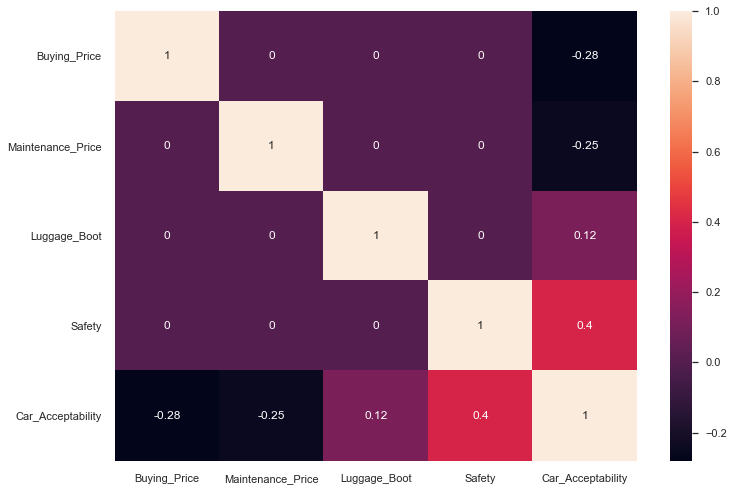

In [682]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = data_car.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The correlation coefficient matrix show linear correlation with "Safety" which have a high correlation with the target variable Car Acceptability i.e. strong positive correlation of (0.39) and Buying_Price with high negative correlation with Car_Acceptability at (-0.29).

In [610]:
# checking the unique values in Buying_Price column

data_car['Buying_Price'].value_counts()

med      432
vhigh    432
low      432
high     432
Name: Buying_Price, dtype: int64

# Encoding the Ordinal Columns (i.e. Column with text as value) into Numerical Values

Let me first encode the ordinal columns, ‘Buying_Price’, ‘Maintenance_Price’, ‘Luggage_Boot’ and ‘Safety’ into numerical representation/values.

In [611]:
data_car['Buying_Price'] = data_car['Buying_Price'].replace({'low':0,'med': 1,'high': 2,'vhigh': 3})
data_car['Maintenance_Price'] = data_car['Maintenance_Price'].replace({'low':0,'med': 1,'high': 2,'vhigh': 3})
data_car['Luggage_Boot'] = data_car['Luggage_Boot'].replace({'small': 0, 'med': 1, 'big': 2})
data_car['Safety'] = data_car['Safety'].replace({'low':0,'med':1,'high':2})
data_car

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,3.0,3.0,2,2,0.0,0.0,unacc
1,3.0,3.0,2,2,0.0,1.0,unacc
2,3.0,3.0,2,2,0.0,2.0,unacc
3,3.0,3.0,2,2,1.0,0.0,unacc
4,3.0,3.0,2,2,1.0,1.0,unacc
...,...,...,...,...,...,...,...
1725,0.0,0.0,5more,more,2.0,0.0,unacc
1726,0.0,0.0,5more,more,2.0,1.0,good
1727,0.0,0.0,5more,more,2.0,2.0,vgood
1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
data_car.head(15)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,3.0,3.0,2,2,0.0,0.0,unacc
1,3.0,3.0,2,2,0.0,1.0,unacc
2,3.0,3.0,2,2,0.0,2.0,unacc
3,3.0,3.0,2,2,1.0,0.0,unacc
4,3.0,3.0,2,2,1.0,1.0,unacc
5,3.0,3.0,2,2,1.0,2.0,unacc
6,3.0,3.0,2,2,2.0,0.0,unacc
7,3.0,3.0,2,2,2.0,1.0,unacc
8,3.0,3.0,2,2,2.0,2.0,unacc
9,3.0,3.0,2,4,0.0,0.0,unacc


# Checking for Unique Values in the Columns
Let us check the unique values in "Number_of_Doors and Number_of_Person" columns

In [613]:
# checking the unique values in Number_of_Doors

data_car['Number_of_Doors'].value_counts()

3        432
5more    432
4        432
2        432
Name: Number_of_Doors, dtype: int64

In [614]:
# checking the unique values in Number_of_Person

data_car['Number_of_Person'].value_counts()

4       576
more    576
2       576
Name: Number_of_Person, dtype: int64

The two columns "Number  of Doors and Number of Person" contains "5more" and "more" respectively. Therefore, 5more in the Number of Doors will be replace with 5 and "more" in Number of Person column with 5

In [615]:
data_car['Number_of_Doors'] = data_car['Number_of_Doors'].replace({'5more': 5})
data_car['Number_of_Person'] = data_car['Number_of_Person'].replace({'more': 5})
data_car.head(12)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,3.0,3.0,2,2,0.0,0.0,unacc
1,3.0,3.0,2,2,0.0,1.0,unacc
2,3.0,3.0,2,2,0.0,2.0,unacc
3,3.0,3.0,2,2,1.0,0.0,unacc
4,3.0,3.0,2,2,1.0,1.0,unacc
5,3.0,3.0,2,2,1.0,2.0,unacc
6,3.0,3.0,2,2,2.0,0.0,unacc
7,3.0,3.0,2,2,2.0,1.0,unacc
8,3.0,3.0,2,2,2.0,2.0,unacc
9,3.0,3.0,2,4,0.0,0.0,unacc


In [616]:
# Check the unique value in the column "Car_Acceptability"
data_car['Car_Acceptability'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64

# Plot the Target Variable Distribution (Car Acceptability) using Plotly Chart

In [617]:
fig = {
  "data": [
    {
      "values": [1210,384,69,65],
      "labels": [
        "Unacceptable",
        "Acceptable",
        "Good",
        "Very Good"
      ],
      "domain": {"column": 0},
      "name": "Car Acceptability",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribution of Cars Acceptability",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='cars_donut')

In [618]:
# checking the unique values in Buying_Price column

data_car['Buying_Price'].value_counts()

0.0    432
1.0    432
2.0    432
3.0    432
Name: Buying_Price, dtype: int64

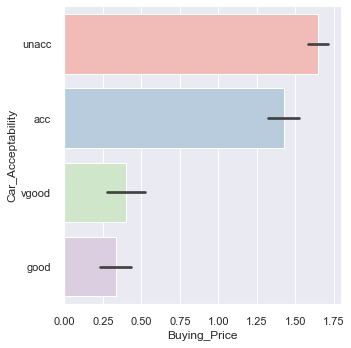

In [619]:
# Checking the relationship of Car_Acceptability vs Buying Price

data_car['Car_Acceptability'].unique()
Buying_Price = sns.factorplot(y="Car_Acceptability", x="Buying_Price",data= data_car,kind="bar" ,palette = "Pastel1")

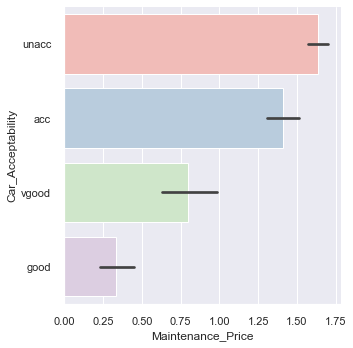

In [620]:
# Checking the relationship of Car_Acceptability vs Maintenance Price

data_car['Car_Acceptability'].unique()
Maintenance_Price = sns.factorplot(y="Car_Acceptability", x="Maintenance_Price",data= data_car,kind="bar" ,palette = "Pastel1")

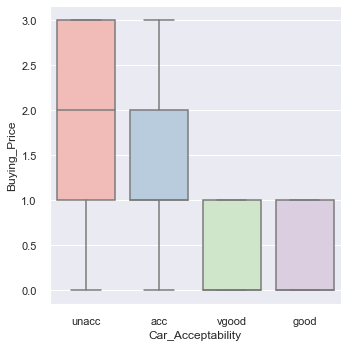

In [621]:
g = sns.factorplot(x="Car_Acceptability", y = "Buying_Price",data = data_car, kind="box", palette = "Pastel1")

# Label Encode - Target Variable
Converting the target variable to integer value i.e. numerical value. so Factorize library in Python was used. Sklearn can also be used for same purpose.

The target variable is marked as class in the dataframe. The values are present in string format. However the algorithm requires the variables to be coded into its equivalent integer codes. We can convert the string categorical values into a integer code using factorize method of the pandas library.

In [622]:
data_car['Car_Acceptability'],Car_Acceptability_names = pd.factorize(data_car['Car_Acceptability'])

In [623]:
# To print out the unique values identify in the "Car Acceptability" column.
print(Car_Acceptability_names)
print(data_car['Car_Acceptability'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[ 0  1  2  3 -1]


As we can see the values has been encoded into 5 different numeric labels.

In [624]:
data_car.head(10)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
0,3.0,3.0,2,2,0.0,0.0,0
1,3.0,3.0,2,2,0.0,1.0,0
2,3.0,3.0,2,2,0.0,2.0,0
3,3.0,3.0,2,2,1.0,0.0,0
4,3.0,3.0,2,2,1.0,1.0,0
5,3.0,3.0,2,2,1.0,2.0,0
6,3.0,3.0,2,2,2.0,0.0,0
7,3.0,3.0,2,2,2.0,1.0,0
8,3.0,3.0,2,2,2.0,2.0,0
9,3.0,3.0,2,4,0.0,0.0,0


In [625]:
data_car.tail(30)

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
1700,0.0,0.0,4,5,2.0,2.0,2
1701,0.0,0.0,5,2,0.0,0.0,0
1702,0.0,0.0,5,2,0.0,1.0,0
1703,0.0,0.0,5,2,0.0,2.0,0
1704,0.0,0.0,5,2,1.0,0.0,0
1705,0.0,0.0,5,2,1.0,1.0,0
1706,0.0,0.0,5,2,1.0,2.0,0
1707,0.0,0.0,5,2,2.0,0.0,0
1708,0.0,0.0,5,2,2.0,1.0,0
1709,0.0,0.0,5,2,2.0,2.0,0


In [626]:
# For purpose of Data Modelling, the "NaN" were removed from the different columns and replace with 0

data_car['Safety'] = data_car['Safety'].replace(np.nan, 0)
data_car['Buying_Price'] = data_car['Buying_Price'].replace(np.nan, 0)
data_car['Maintenance_Price'] = data_car['Maintenance_Price'].replace(np.nan, 0)
data_car['Number_of_Doors'] = data_car['Number_of_Doors'].replace(np.nan, 0)
data_car['Luggage_Boot'] = data_car['Luggage_Boot'].replace(np.nan, 0)
data_car['Number_of_Person'] = data_car['Number_of_Person'].replace(np.nan, 0)



In [627]:
data_car.tail()

,Buying_Price,Maintenance_Price,Number_of_Doors,Number_of_Person,Luggage_Boot,Safety,Car_Acceptability
1725,0.0,0.0,5,5,2.0,0.0,0
1726,0.0,0.0,5,5,2.0,1.0,3
1727,0.0,0.0,5,5,2.0,2.0,2
1728,0.0,0.0,0,0,0.0,0.0,-1
1729,0.0,0.0,0,0,0.0,0.0,-1


In [628]:
# Check the unique value in the encoded column "Car_Acceptability"
data_car['Car_Acceptability'].value_counts()

 0    1210
 1     384
 3      69
 2      65
-1       2
Name: Car_Acceptability, dtype: int64

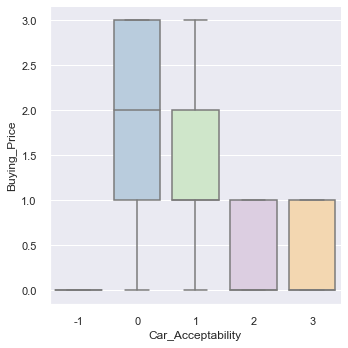

In [629]:
g = sns.factorplot(x="Car_Acceptability", y = "Buying_Price",data = data_car, kind="box", palette = "Pastel1")

In [630]:
# To view the number of columns
data_car.columns

Index(['Buying_Price', 'Maintenance_Price', 'Number_of_Doors',
       'Number_of_Person', 'Luggage_Boot', 'Safety', 'Car_Acceptability'],
      dtype='object')

# Feature Selection
Here, we need to divide given columns into two types of variables 
- Dependent(or target variable) and 
- Independent variable(or feature variables).

In [631]:
#Dividing the dataframe into x features and y target variable
X = data_car.iloc[:, :-1]  
y = data_car.iloc[:, 6]

In [632]:
#split dataset in features and target variable

feature_cols = ['Buying_Price', 'Maintenance_Price', 'Number_of_Doors','Number_of_Person', 'Luggage_Boot', 'Safety']
          
X = data_car[feature_cols] # Features

y = data_car['Car_Acceptability'] # Target variable

# Splitting Data - To Understand Model Performance
  The dataset is splited into 70% train and 30% test

In [633]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [634]:
# We finally print the shapes of our training and test set to verify if the splitting has occurred properly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1211, 6)
(519, 6)
(1211,)
(519,)


# k-Nearest Neighbor - Implementing K-NN Algorithm model on the dataset

K-NN is one of the simplest algorithm, and widely used for classification task. It works on the principle that similar things are classified as belonging to a particular class. The training samples are vectors in a multi-dimensional space, each having a class label.In the training phase,the algorithm consists of storing the feature vectors and class labels of the training samples.During classification phase, k is a user-defined constant, and an unlabeled vector (a test point) is classified by assigning the label which is most frequent among the k training samples nearest to that point.

In [635]:
# Training the Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,  metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [636]:
# Make Prediction on the Model
y_pred = knn.predict(X_test)

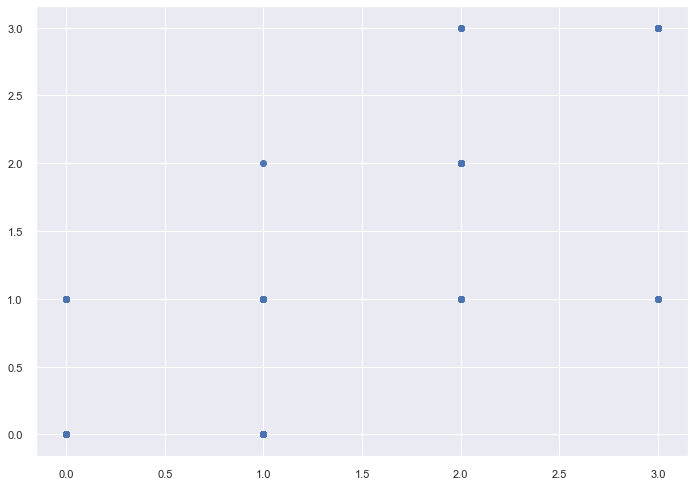

In [637]:
plt.scatter(y_test, y_pred)

# Model Evaluation 

In [638]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9441233140655106


We can see that our model has been developed extremely well and accuracy is 94%. Let us have a look into the confusion matrix.

In [639]:
f1_KNN=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",knn.score(X_train, y_train))
print("Testing Accuracy: ", knn.score(X_test, y_test))
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9777043765483072
Testing Accuracy:  0.9441233140655106
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       371
           1       0.87      0.90      0.88       110
           2       0.94      0.65      0.77        23
           3       0.79      0.73      0.76        15

    accuracy                           0.94       519
   macro avg       0.89      0.82      0.85       519
weighted avg       0.94      0.94      0.94       519



The accuracy of both the training and testing is extremely well with an accuracy of 97% and 94% respectively

In [640]:
# import the metrics class

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[365,   6,   0,   0],
       [ 10,  99,   1,   0],
       [  0,   5,  15,   3],
       [  0,   4,   0,  11]], dtype=int64)

Text(0.5, 527.9871999999999, 'Predicted label')

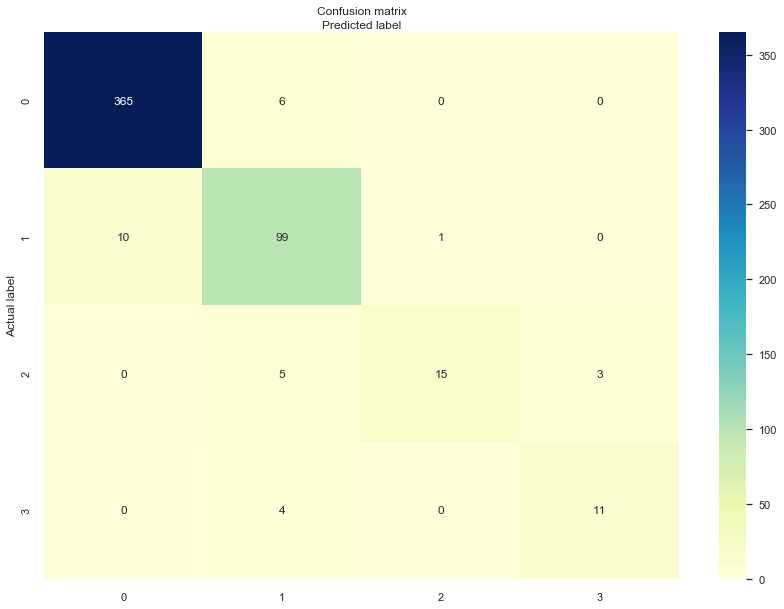

In [641]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Logistic Regression - Implementing using Python
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), 

In logistic regression techniques, the train and testing dataset is divided in 70% training and 30% testing respectively

In [642]:
from sklearn.linear_model import LogisticRegression

In [643]:
# Train the Model

model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [644]:
# Make Prediction on the Model
y_predict = model_LogReg.predict(X_test)

# Model Evaluation

In [645]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9441233140655106


In [646]:
y_pred = model_LogReg.predict(X_test)
f1_LR=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",model_LogReg.score(X_train, y_train))
print("Testing Accuracy: ", model_LogReg.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.8488852188274154
Testing Accuracy:  0.8458574181117534
[[351  14   2   4]
 [ 38  69   3   0]
 [  0   8  13   2]
 [  0   9   0   6]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       371
           1       0.69      0.63      0.66       110
           2       0.72      0.57      0.63        23
           3       0.50      0.40      0.44        15

    accuracy                           0.85       519
   macro avg       0.70      0.63      0.66       519
weighted avg       0.84      0.85      0.84       519



Text(0.5, 384.16, 'Predicted label')

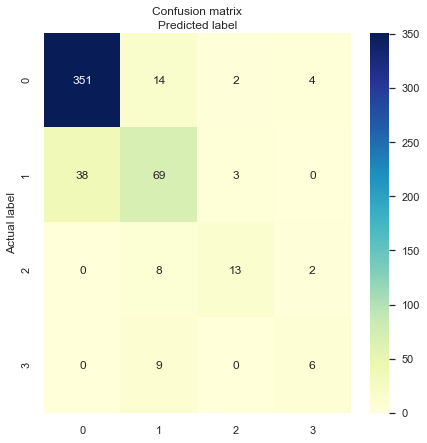

In [647]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree - Implement in Python

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

Further Reading on Decision Tree - Check this link: https://scikit-learn.org/stable/modules/tree.html

In [648]:
#Trying decision tree classifier

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=3)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [649]:
# use the model to make predictions with the test data

y_pred = decision_tree.predict(X_test)

In [650]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7861271676300579


In [651]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 111


As you can see the algorithm was able to achieve classification accuracy of 86% on the held out set. Only 69 samples were misclassified.

In [652]:
y_pred = decision_tree.predict(X_test)
f1_DT=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",decision_tree.score(X_train, y_train))
print("Testing Accuracy: ", decision_tree.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.7943848059454995
Testing Accuracy:  0.7861271676300579
[[358  13   0   0]
 [ 60  50   0   0]
 [  0  23   0   0]
 [  0  15   0   0]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       371
           1       0.50      0.45      0.47       110
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        15

    accuracy                           0.79       519
   macro avg       0.34      0.35      0.35       519
weighted avg       0.72      0.79      0.75       519



Text(0.5, 384.16, 'Predicted label')

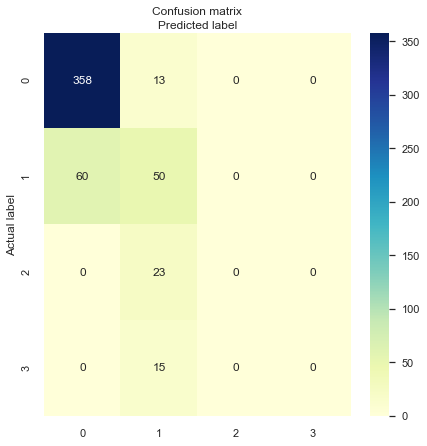

In [653]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualization of the Decision Tree Graphically

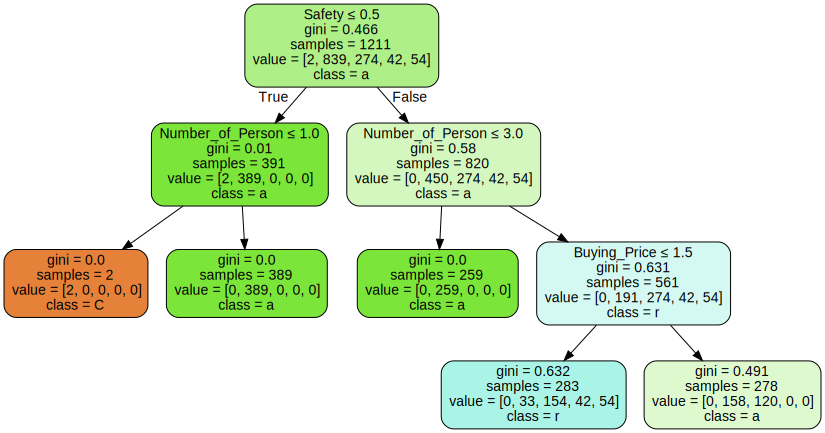

<Figure size 360x360 with 0 Axes>

In [654]:
from sklearn import tree
import graphviz

fig = plt.figure(figsize=(5,5))

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Car_Acceptability",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Random Forest Model
Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a lot of decision trees at training time and outputting the class that is the mode of the classes ( for classification task) or mean prediction ( for regression) of the individual.

For example, given a data-set in binary classification task, a random forest will construct 5 different decision trees(DT). Each decision tree predicts that a particular observation belogs to class A or B. Suppose, 3 DT predicts, the observation belongs to class A and 2 DT predicts, that it belongs to class B. The final prediction will be that the observation belongs to class A, because of majority votes.

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Further reading on Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [655]:
# Still using same split of dataset - 70% of training, 30% of testing

from sklearn.ensemble import RandomForestClassifier  # Import random forest classifier

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=50, random_state = 0, criterion = 'entropy')
rf_classifier = rf_classifier.fit(X_train, y_train)
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [656]:
y_pred = rf_classifier.predict(X_test)

In [657]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9710982658959537


# Visualize or Print Random Forest Algorithm Model

In [658]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

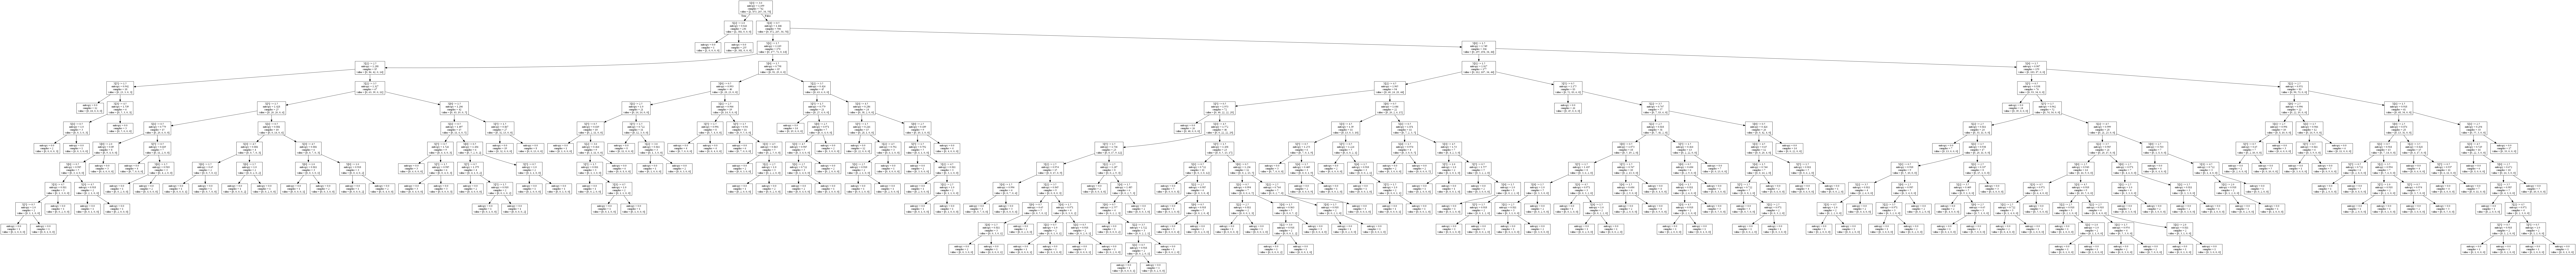

<Figure size 864x1080 with 0 Axes>

In [659]:
fig = plt.figure(figsize=(12, 15))

tree_count = 0
for tree_in_random_forest in rf_classifier.estimators_:
    if (tree_count ==1):        
        rfr_file = tree.export_graphviz(tree_in_random_forest, out_file=None)
        rfr_graph = pydotplus.graph_from_dot_data(rfr_file)        
    tree_count = tree_count + 1
Image(rfr_graph.create_png())

# Model Evauation

In [660]:
y_pred = rf_classifier.predict(X_test)
f1_RF=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",rf_classifier.score(X_train, y_train))
print("Testing Accuracy: ", rf_classifier.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  1.0
Testing Accuracy:  0.9710982658959537
[[367   4   0   0]
 [  5 105   0   0]
 [  0   4  17   2]
 [  0   0   0  15]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       371
           1       0.93      0.95      0.94       110
           2       1.00      0.74      0.85        23
           3       0.88      1.00      0.94        15

    accuracy                           0.97       519
   macro avg       0.95      0.92      0.93       519
weighted avg       0.97      0.97      0.97       519



Text(0.5, 384.16, 'Predicted label')

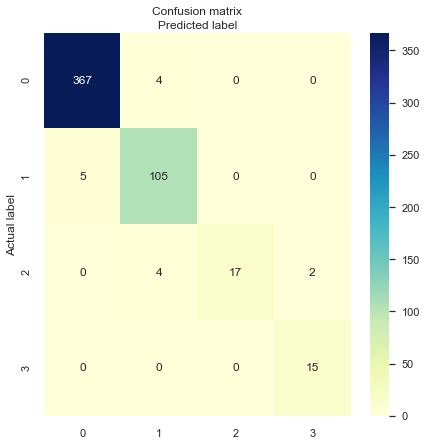

In [661]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Identify the Important Features for the Classification

Feature ranking:
feature: Buying_Price, importance: 0.17638114970200394
feature: Maintenance_Price, importance: 0.1409144003079548
feature: Number_of_Doors, importance: 0.06593608183602374
feature: Number_of_Person, importance: 0.23051594028265712
feature: Luggage_Boot, importance: 0.09503759812724524
feature: Safety, importance: 0.2912148297441151


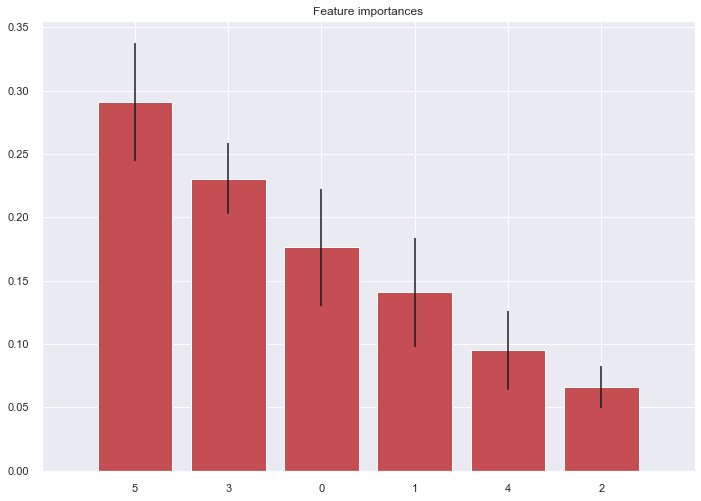

In [662]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for feat, importance in zip(X.columns, rf_classifier.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

From the above code, we got to know that safety is the most important feature for classification

# Naive Bayes
Naive Bayes is a technique for constructing classifiers. There is no single algorithm for training classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers makes an assumption that value of a particular feature is independent of value of others, given the class . For example, a fruit may be considered to be an orange if it is orange in colour, round, and about 10 cm in diameter. A naive Bayes classifier considers each of the features to contribute independently to the probability, that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

Naive Bayes classifiers requires very small amount of data and are majorly used in text classification. But in this blog, I will implement it in our car data-set and look how it performs.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y and dependent feature vector x1 through xN

Further Reading on Naive Bayes Techniques - https://scikit-learn.org/stable/modules/naive_bayes.html


In [663]:
from sklearn.naive_bayes import GaussianNB  # import Naive Bayes classifier

# training the model
nb_classifier = GaussianNB()
nb_classifier = nb_classifier.fit(X_train, y_train)

In [664]:
# make prediction on testing model
y_pred = nb_classifier.predict(X_test)

In [665]:
# testing the accuracy of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7938342967244701


# Model Evaluation

In [666]:
y_pred = nb_classifier.predict(X_test)
f1_NB=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",nb_classifier.score(X_train, y_train))
print("Testing Accuracy: ", nb_classifier.score(X_test, y_test))

print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.7745664739884393
Testing Accuracy:  0.7938342967244701
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       371
           1       0.65      0.34      0.44       110
           2       0.28      1.00      0.44        23
           3       1.00      0.13      0.24        15

    accuracy                           0.79       519
   macro avg       0.71      0.60      0.51       519
weighted avg       0.84      0.79      0.79       519



[[350  14   7   0]
 [ 28  37  45   0]
 [  0   0  23   0]
 [  0   6   7   2]]


Text(0.5, 384.16, 'Predicted label')

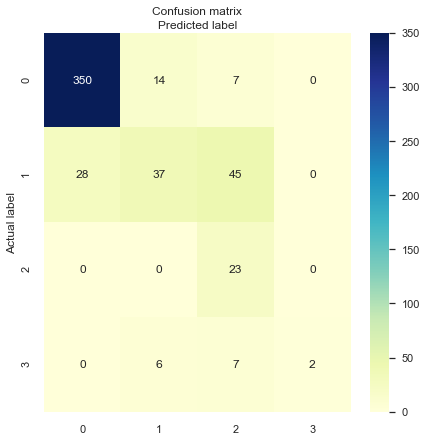

In [667]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can see that the Naive Bayes model didn’t perform well in this task, but we got an understanding, how to implement it using scikit-learn

# Support Vector Machine(SVM)
In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems

Support Vector Machine is a supervised machine learning algorithm that is used for both regression and classification. Generally it is used for classification task. In SVM, we start by plotting each data point in n-dimensional space. After plotting the data points, a hyper-plane needs to be found that classifies the data-points according to their labels. The hyper-plane must be constructed in such a way that distance between nearest data-point is maximum.

Further Reading on SVM - https://scikit-learn.org/stable/modules/svm.html

In [668]:
# Import SVM classifier
from sklearn import svm

In [669]:
# Train the dataset with SVM classifier

svm_classifier = svm.SVC()
svm_classifier = svm_classifier.fit(X_train, y_train)

In [670]:
# Make prediction on the unseen dataset (25% testing dataset)

y_pred = svm_classifier.predict(X_test)

In [671]:
# testing the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9248554913294798


# Model Evaluation

In [672]:
y_pred = svm_classifier.predict(X_test)
f1_SVM=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",svm_classifier.score(X_train, y_train))
print("Testing Accuracy: ", svm_classifier.score(X_test, y_test))

print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.9405450041288191
Testing Accuracy:  0.9248554913294798
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       371
           1       0.82      0.89      0.86       110
           2       1.00      0.48      0.65        23
           3       0.57      0.53      0.55        15

    accuracy                           0.92       519
   macro avg       0.84      0.72      0.76       519
weighted avg       0.93      0.92      0.92       519



[[363   8   0   0]
 [ 12  98   0   0]
 [  0   6  11   6]
 [  0   7   0   8]]


Text(0.5, 384.16, 'Predicted label')

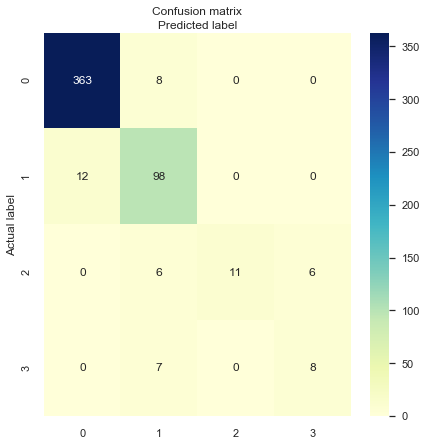

In [673]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can see that the SVM model has performed pretty well but not good enough, like the tree based models

# XG-Boost

XG-Boosting is another ensemble based algorithm that learns from “weak learners”. It is one of the newest algorithm and has proved to be highly efficient and fast. In boosting, individual models are not built on completely random subsets of data but sequentially by putting more weight on instances with wrong predictions and high errors. Just like Gradient Descent, it learns from previous mistakes. For example, for a particular observation, the predicted result and the actual result is compared. After comparison, the partial derivative of the loss function is calculated and the weights are adjusted accordingly.

I will implement Gradient Boosting on our car data-set. Before that I will convert data types of “doors” and “person” column to int64.

In [674]:
# in order to apply XG-Boost Algorithm, I will need to convert the "Number_of_Doors" and "Number_of_Person" to Integer i.e int64

X_train['Number_of_Doors'] = pd.to_numeric(X_train['Number_of_Doors'])
X_train['Number_of_Person'] = pd.to_numeric(X_train['Number_of_Person'])
X_test['Number_of_Doors'] = pd.to_numeric(X_test['Number_of_Doors'])
X_test['Number_of_Person'] = pd.to_numeric(X_test['Number_of_Person'])

In [675]:
# import xg-boost classifier

from xgboost import XGBClassifier

In [676]:
# Training the XG Boost model with the train dataset of 70%

xgb_classifier = XGBClassifier()
xgb_classifier = xgb_classifier.fit(X_train, y_train)

In [677]:
y_pred = xgb_classifier.predict(X_test)

In [678]:
# checking the accuracy of the classifier

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9865125240847784


Model Evaluation

In [679]:
y_pred = xgb_classifier.predict(X_test)
f1_XGB=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",xgb_classifier.score(X_train, y_train))
print("Testing Accuracy: ", xgb_classifier.score(X_test, y_test))

print(classification_report(y_test,y_pred)) 

Training Accuracy:  1.0
Testing Accuracy:  0.9865125240847784
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.99      1.00       371
           1       0.97      0.99      0.98       110
           2       1.00      0.83      0.90        23
           3       0.88      1.00      0.94        15

    accuracy                           0.99       519
   macro avg       0.77      0.76      0.76       519
weighted avg       0.99      0.99      0.99       519



[[  0   0   0   0   0]
 [  1 369   1   0   0]
 [  0   1 109   0   0]
 [  0   0   2  19   2]
 [  0   0   0   0  15]]


Text(0.5, 384.16, 'Predicted label')

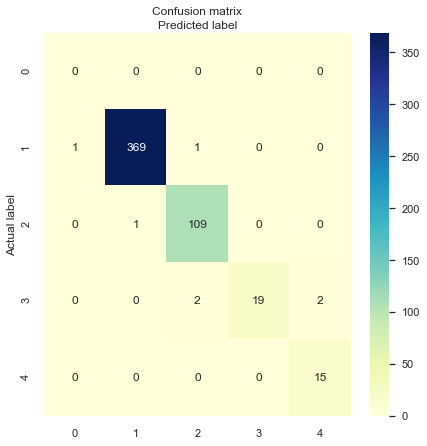

In [680]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusing Matrix in Pictorial Form
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

It is quite evident, how powerful xg-boost is and how accurate results can be predicted using this algorithm

# Comparing the Accuracy of Each Machine Learning Model Prediction

In [687]:
fig = plt.figure(figsize=(5, 5))
models=['K-Nearest Neighbor','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Naive Bayes Classifier','Support Vector Machine','XG Boost']
fig = go.Figure(data=[
    go.Bar(name='f1_score', x=models, y=[f1_KNN,f1_LR,f1_DT,f1_RF,f1_NB,f1_SVM,f1_XGB])])

fig.show()

<Figure size 360x360 with 0 Axes>

This Tutorial has presented to us different machine learning algorithm using real world dataset (Car Evaluation Dataset) and we have learning different procedures to perform model evaluation to know how the models perform on the training and test dataset. 